In [33]:
# Import libraries required for creating models and validating them
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix
import warnings
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics as mt
import statsmodels.api as sm
from time import time
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit

In [34]:
ccdefault=pd.read_csv('../data//UCI_Credit_Card.csv')
ccdefault.rename(columns={'default.payment.next.month':'DEFAULT'},inplace=True)
ccdefault.rename(columns={'PAY_0':'PAY_1'},inplace=True)


In [35]:
mcc = ccdefault.copy()
# Y Response variable dataframe
mcc_Y = mcc['DEFAULT']

# Features with no predictive features with respect to resposne variable
mcredit = mcc.drop(['DEFAULT'],axis=1)
# Create inci_X Explanatory Variables DF to support the individual models
mcc_X = mcredit
mcc_X_knn = mcredit.copy()
mcc_X_nb = mcredit.copy()

In [36]:
cc = ccdefault.copy() # taking a copy in memory
if 'DEFAULT' in cc:
    y = cc['DEFAULT'].values
    del cc['DEFAULT']
    del cc['BILL_AMT1']
    del cc['BILL_AMT2']
    del cc['BILL_AMT3']
    del cc['BILL_AMT4']
    del cc['BILL_AMT5']
    del cc['BILL_AMT6']
    X = cc.values
num_cv_iterations = 5
num_instances = len(y)
cv_object = StratifiedShuffleSplit(n_splits = num_cv_iterations,
test_size = 0.20, train_size = 0.80, random_state=11)
cv_object.get_n_splits(X, y)
print(cv_object)
for train_index, test_index in cv_object.split(X, y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

StratifiedShuffleSplit(n_splits=5, random_state=11, test_size=0.2,
            train_size=0.8)
TRAIN: [28976 29616 20315 ...  6063 16283 15621] TEST: [ 6669  6830 16516 ... 16163  1990  7999]
TRAIN: [11237  9898 17028 ...  1265   611  7250] TEST: [ 4174 19421 15502 ... 19995  6124 25090]
TRAIN: [23721 14143  5492 ...  4346  5119 23351] TEST: [21778  4074 19546 ...   941 14061 13584]
TRAIN: [19706  2009 13912 ...  3924 20112 21366] TEST: [ 7136 15572 21097 ... 24126  8440  7078]
TRAIN: [ 5794  1831 15948 ... 18673 15962 17274] TEST: [17565 28798 29978 ... 10151 11434 21212]


In [37]:
scl_obj = StandardScaler()
scl_obj.fit(X_train) # find scalings for each column that make this zero mean and unit std
# the line of code above only looks at training data to get mean and std and we can use it 
# to transform new feature data

X_train_scaled = scl_obj.transform(X_train) # apply to training
X_test_scaled = scl_obj.transform(X_test) # apply those means and std to the test set (without snooping at the test set values)


X_train_scaled1 = scl_obj.fit_transform(X_train) # apply to training
X_test_scaled1 = scl_obj.fit_transform(X_test) # apply those means and std to the test set (without snooping at the test set values)



In [38]:
# train the model just as before
lr_clf = LogisticRegression(penalty='l2', C=1, class_weight='balanced') # get object, the 'C' value is less (can you guess why??)
lr_clf.fit(X_train_scaled,y_train)  # train object

y_hat = lr_clf.predict(X_test_scaled) # get test set precitions

acc = mt.accuracy_score(y_test,y_hat)
conf = mt.confusion_matrix(y_test,y_hat)
print('accuracy:', acc )
print(conf )
ClassReport = mt.classification_report(y_test,y_hat)
print(ClassReport)

# sort these attributes and spit them out
zip_vars = zip(lr_clf.coef_.T,cc.columns) # combine attributes
zip_vars = sorted(zip_vars)
for coef, name in zip_vars:
    print(name, 'has weight of', coef[0]) # now print them out

accuracy: 0.6856666666666666
[[3254 1419]
 [ 467  860]]
              precision    recall  f1-score   support

           0       0.87      0.70      0.78      4673
           1       0.38      0.65      0.48      1327

    accuracy                           0.69      6000
   macro avg       0.63      0.67      0.63      6000
weighted avg       0.76      0.69      0.71      6000

PAY_AMT2 has weight of -0.23381316518555048
PAY_AMT1 has weight of -0.18736715912904903
LIMIT_BAL has weight of -0.1335240456674428
MARRIAGE has weight of -0.08149421078370524
EDUCATION has weight of -0.07943055435663142
PAY_AMT4 has weight of -0.059024823475476204
PAY_AMT6 has weight of -0.05231386588336771
PAY_AMT5 has weight of -0.050695283560333204
SEX has weight of -0.04976924263184582
PAY_AMT3 has weight of -0.04172415157530846
ID has weight of -0.02597942964986453
PAY_6 has weight of -0.015309773354164948
PAY_4 has weight of 0.006083933585685117
PAY_5 has weight of 0.04187370529605748
AGE has weight of 

In [39]:
# first we create a reusable logisitic regression object
#   here we can setup the object with different learning parameters and constants
lr_clf = LogisticRegression(penalty='l1', C=1, class_weight=None) # get object
#WARNING: THE FIRST WIEGHT WAS 1 
iter_num=0
times_rec=[]
for train_indices, test_indices in cv_object.split(X,y): 
    X_train = X[train_indices]
    y_train = y[train_indices]
    
    X_test = X[test_indices]
    y_test = y[test_indices]
    
     #we count the time in executing the logistic regression
    t0 = time()
    knn = KNeighborsClassifier()
    knn.fit(X_train,y_train)  # train object
    y_hat = knn.predict(X_test) # get test set precitions
    
    t1=time()
    diff=np.array([t1-t0])
    
    print ("The time it takes to fit and predict is " + str(diff[0]) + "\n")    
    times_rec=np.append(times_rec,diff)
    

    # now let's get the accuracy and confusion matrix for this iterations of training/testing
    acc = mt.accuracy_score(y_test,y_hat)
    conf = mt.confusion_matrix(y_test,y_hat)
    print("====Iteration",iter_num," ====")
    print("accuracy", acc )
    print("confusion matrix\n",conf)
    
    print("\n *** CLASSIFICATION REPORT ****")
    #### CLASSIFICATION REPORT
    ClassReport = mt.classification_report(y_test,y_hat)
    print(ClassReport)
    
    iter_num+=1
    
    
print("The average time to fit and predict 3 logistic regressions with 80/20 training/test split is: " + str(times_rec.mean()) )

The time it takes to fit and predict is 0.6491928100585938

====Iteration 0  ====
accuracy 0.7488333333333334
confusion matrix
 [[4297  376]
 [1131  196]]

 *** CLASSIFICATION REPORT ****
              precision    recall  f1-score   support

           0       0.79      0.92      0.85      4673
           1       0.34      0.15      0.21      1327

    accuracy                           0.75      6000
   macro avg       0.57      0.53      0.53      6000
weighted avg       0.69      0.75      0.71      6000

The time it takes to fit and predict is 0.6283366680145264

====Iteration 1  ====
accuracy 0.749
confusion matrix
 [[4314  359]
 [1147  180]]

 *** CLASSIFICATION REPORT ****
              precision    recall  f1-score   support

           0       0.79      0.92      0.85      4673
           1       0.33      0.14      0.19      1327

    accuracy                           0.75      6000
   macro avg       0.56      0.53      0.52      6000
weighted avg       0.69      0.75     

confusion matrix For knn model 
[[4315 1126]
 [ 358  201]]


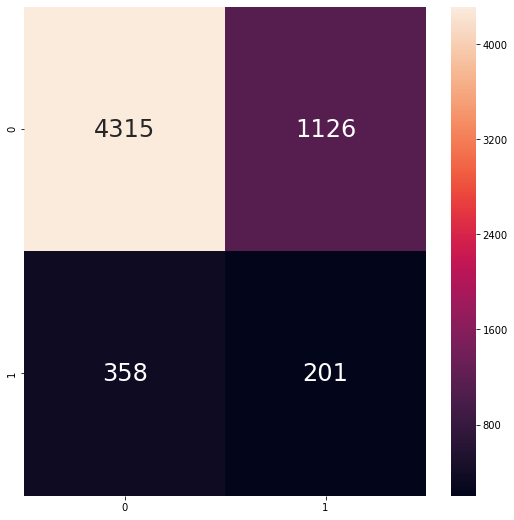

In [40]:
cm = confusion_matrix(y_hat, y_test)
plt.figure(figsize=(9,9))
print ('confusion matrix For knn model ')
print(cm)
sns.heatmap(cm, annot= True, annot_kws={"size": 24}, fmt = 'd')


In [46]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf.fit(X_train,y_train)  # train object
y_hat = clf.predict(X_test) 

confusion matrix For decision tree model 
[[3799  771]
 [ 874  556]]


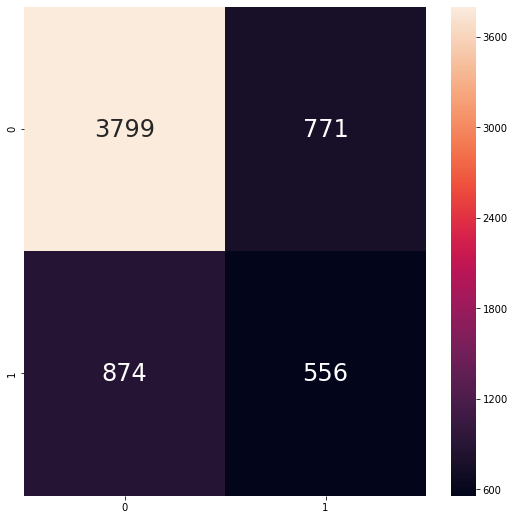

In [47]:
cm = confusion_matrix(y_hat, y_test)
plt.figure(figsize=(9,9))
print ('confusion matrix For decision tree model ')
print(cm)
sns.heatmap(cm, annot= True, annot_kws={"size": 24}, fmt = 'd')

[Text(247.78073996622996, 214.91162790697675, 'X[6] <= 1.5\nentropy = 0.345\nsamples = 24000\nvalue = [18691, 5309]'),
 Text(196.7223130162426, 209.85488372093022, 'X[7] <= 1.5\nentropy = 0.277\nsamples = 21528\nvalue = [17945, 3583]'),
 Text(131.3465304239634, 204.79813953488372, 'X[13] <= 1294.5\nentropy = 0.245\nsamples = 19699\nvalue = [16881, 2818]'),
 Text(72.38886739562707, 199.74139534883722, 'X[15] <= 1003.5\nentropy = 0.331\nsamples = 6129\nvalue = [4848, 1281]'),
 Text(57.683173122914795, 194.6846511627907, 'X[6] <= 0.5\nentropy = 0.36\nsamples = 4448\nvalue = [3400, 1048]'),
 Text(42.18762148869194, 189.62790697674419, 'X[8] <= 1.0\nentropy = 0.337\nsamples = 3497\nvalue = [2748, 749]'),
 Text(34.90536062079568, 184.57116279069766, 'X[12] <= 1375.5\nentropy = 0.315\nsamples = 3090\nvalue = [2485, 605]'),
 Text(28.421683068997318, 179.51441860465115, 'X[10] <= 1.0\nentropy = 0.342\nsamples = 2215\nvalue = [1731, 484]'),
 Text(21.528246092115257, 174.45767441860465, 'X[5] <= 

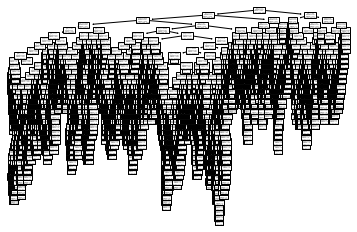

In [50]:
tree.plot_tree(clf.fit(X_train,y_train))

In [45]:
from sklearn.naive_bayes import BernoulliNB
clf = BernoulliNB()
clf = BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

clf.fit(X_train,y_train)  # train object
y_hat = clf.predict(X_test) 
acc = mt.accuracy_score(y_test,y_hat)
conf = mt.confusion_matrix(y_test,y_hat)
print('accuracy:', acc )
print(conf )

accuracy: 0.779
[[4051  622]
 [ 704  623]]
